## 1 Этап. Загрузка данных. Общая проверка информации.

In [1]:
import pandas as pd

churn_data = pd.read_csv('churn.csv',  sep=',')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
churn_data.info() #общая информация (количество строк и колонок, тип данных, есть ли незаполненные ячейки)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 2 Этап. Обработка данных.
- Создаем копию таблицы, чтобы при переопределении данных была возможность восстановить случайно удаленную информацию.
- Удаляем лишние колонки (RowNumber, так же можно удалить колонку Surname, т.к это личная информация и для статистических выводов и построения графиков она не нужна).
- Проверяем информацию, например, по возратсту клиента (есть ли клиенты с возрастом, который может указывать на неточность данных, например, меньше 18 и больше 100 ) и везде ли указан пол клиента.
- В соответсттвии с колонкой Tenure можем предположить, что для анализа представлен срез клиентов обслуживающихся в банке до 10 лет.

In [3]:
churn_data_df = churn_data.copy() #создаем копию
churn_data_df = churn_data_df.drop(['RowNumber', 'Surname'], axis=1) #удаляем колонки 
churn_data_df.head() #проверяем результат

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_data_df['Age'].max() #максимальный возраст клиента соответствует реальности

92

In [5]:
churn_data_df['Age'].min() #минимальный возраст клиента соответствует реальности

18

In [6]:
churn_data_df['Gender'].value_counts() #все колонки заполнены пол клиента делится только на Male и Female

Male      5457
Female    4543
Name: Gender, dtype: int64

In [7]:
churn_data_df['Tenure'].value_counts() #представлен срез клиентов обслуживающихся до 10 лет

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

## 3 Этап. Выполнение заданий.

**1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.**
___________________________________________________________________________________________________________________________________

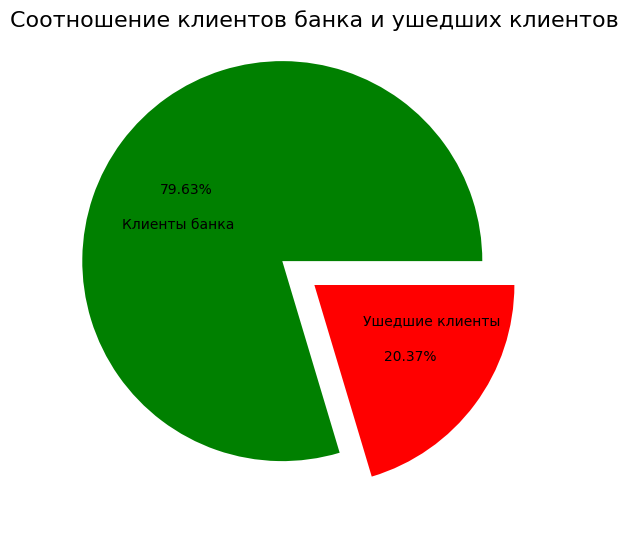

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_data_df['Exited'].value_counts(),
    labels=['Клиенты банка', 'Ушедшие клиенты'],
    autopct='%.2f%%',
    labeldistance = 0.3,
    colors=['green', 'red'],
    
    explode = [0.2, 0]
);
axes.set_title('Соотношение клиентов банка и ушедших клиентов', fontsize=16);

- На графике показано соотношение ушедших клиентов т.е закрывших счет и клиентов продолжающих обслуживаться в банке за определенное количество времени. По данным из интернета нормальный отток клиентов (Churn Rate)* для малых и средних компаний составляет 3-5%, для крупных 1%, т.е показатель 20.37% является высоким. 
- Из графика нельзя сделать вывод являются ли оставшиеся клиенты лояльными, т.к мы не знаем как давно они открыли счет, могут ли рекомендовать банк знакомым, как часто пользуются новыми и дополнительными продуктами банка(страховка, кредиты, вклады) и множество других факторов, оценивающих именно лояльность клиента.
- Так же нельзя сделать вывод хороший ли это показатель для этого банка. Т.к нам не известно распределение показателя по времени. 

*источник данных https://emailsoldiers.ru/blog/churn-rate

**2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.**
______________________________________________________________________________________________________________________________________

In [9]:
filtered_by_balance = churn_data_df[churn_data_df['Balance'] > 2500]

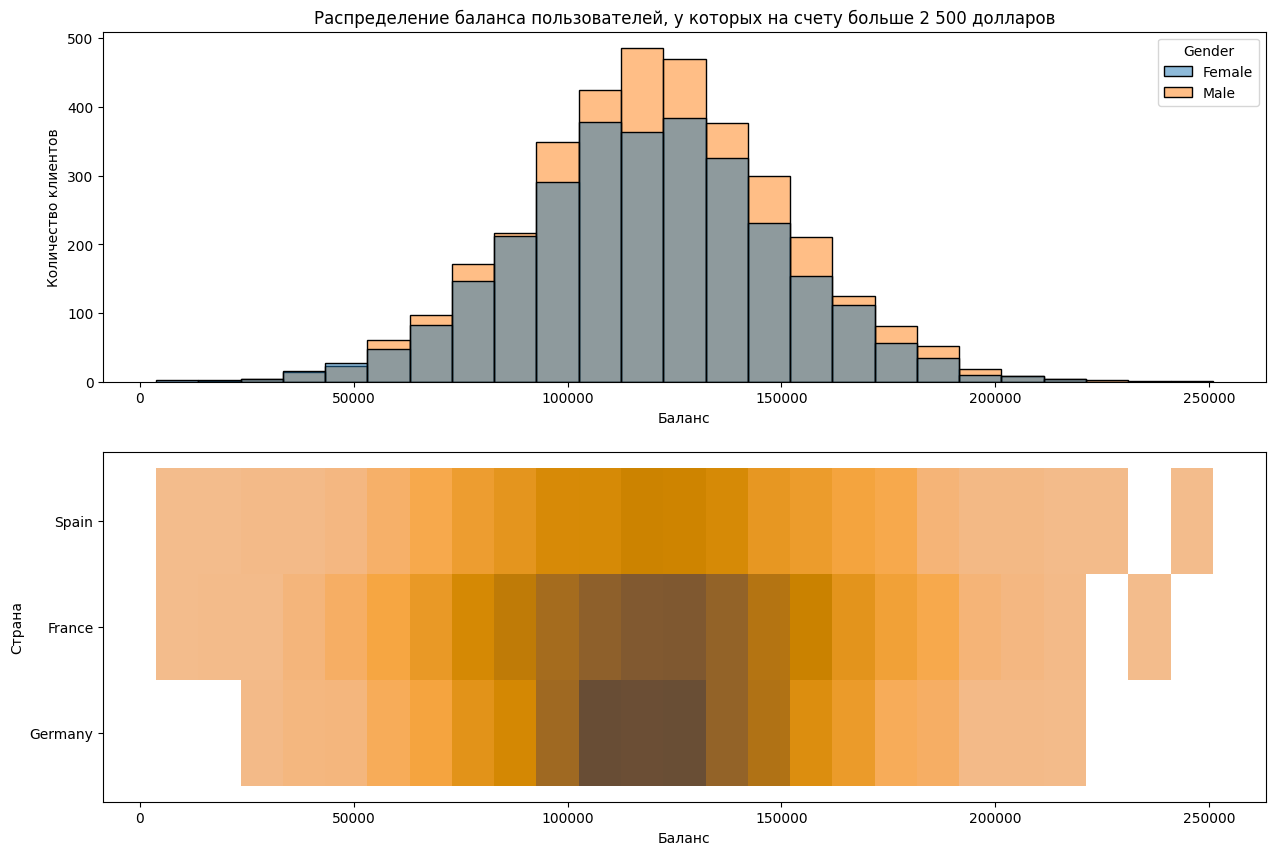

In [53]:
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

sns.histplot(
    data=filtered_by_balance,
    x='Balance',
    bins=25,
    hue='Gender',
    ax=axes[0]
    
);
axes[0].set_xlabel('Баланс')
axes[0].set_ylabel('Количество клиентов')
axes[0].set_title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов')
axes[1].set_xlabel('Баланс')
axes[1].set_ylabel('Страна')
sns.histplot(
    data=filtered_by_balance,
    x='Balance',
    y='Geography',
    bins=25,
    color='orange',
    ax=axes[1]
);


- Клиентов мужчин больше, чем женщин.
- Основная масса вкладчиков держат на счетах от 100 до 145 тыс. долларов.
- В Испании вкладчики распределяются более равномерно. По интенсивности цвета можно увидеть как распределяются клиенты банка по суммам. Клиенты с самыми большими суммами на счету находятся во Франции и Испании.


**3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.**
___________________________________________________________________________________________

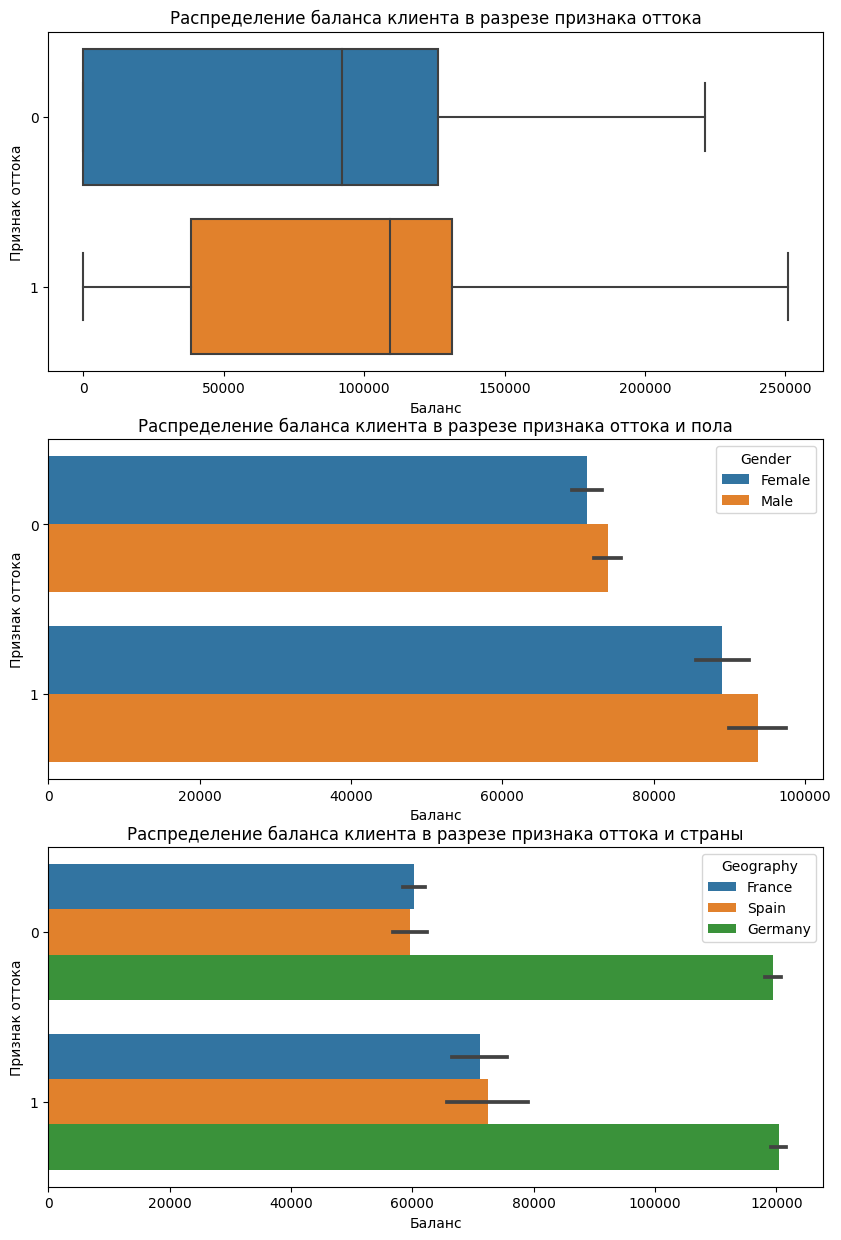

In [105]:
import seaborn as sns
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,15))


sns.boxplot(ax=axes[0], data=churn_data_df, y='Exited', x='Balance', orient='h', width=0.8);
axes[0].set_title('Распределение баланса клиента в разрезе признака оттока')
axes[0].set_xlabel('Баланс')
axes[0].set_ylabel('Признак оттока');


sns.barplot(ax=axes[1], x="Balance", y="Exited", hue="Gender", orient='h', data=churn_data_df)
axes[1].set_title('Распределение баланса клиента в разрезе признака оттока и пола')
axes[1].set_xlabel('Баланс')
axes[1].set_ylabel('Признак оттока');


sns.barplot(ax=axes[2], x="Balance", y="Exited", hue="Geography", orient='h', data=churn_data_df)
axes[2].set_title('Распределение баланса клиента в разрезе признака оттока и страны')
axes[2].set_xlabel('Баланс')
axes[2].set_ylabel('Признак оттока');


- 0 - клиент банка, 1 - ушедший клиент
- Из первого графика видно, что разброс сумм на счетах у клиентов банка(0) больше чем у ушедших клиентов(1). Возможно, это связано с тем, что банк фиксировал поледнюю сумму, перед закрытием счета. Т.е у клиента была какая-то сумма, он ее забирал и уходил из банка.
- Мужчины чаще закрывают счета, чем женщины. Ушедшие клиенты хранили на счетах большие суммы. 
- Суммы у ушедших и оставшихся на счету клиентов по странам почти одинаковые.
- Обобщая, можно предположить, что банк предлагал какой-то интересный продукт, например, вклад под высокий процент или хорошие условия по ипотеке, но для этого на счету должна была быть какая-то сумма денег (предполагаю, что от 40 тыс.). Как только акция закончилась, часть клиентов просто закрыли счета и забрали эти лимиты, а часть клиентов просто обнулили балансы, но не закрыли счет. Возможно, ожидая, что банк предложит еще какой-то интересный продукт.

**4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?**
________________________________________________________________________________________________________________________________________

In [99]:
import plotly
import plotly.express as px

fig1 = px.histogram(
    data_frame =churn_data_df, 
    x='Age', #ось абсцисс
    color='Exited',
    height=500, #высота
    width=700, #ширина
    histfunc='count',
    title='Распределение возраста клиентов: 1 - ушедшие, 0 - лояльные', 
    nbins = 25
)
fig1.show()

import plotly
import plotly.express as px 

fig2 = px.box(
    data_frame =churn_data_df,
    x='Age', #ось абсцисс
    color='Exited',
    height=500, #высота
    width=700, #ширина
    title='Распределение возраста клиентов: 1 - ушедшие, 0 - лояльные', 
)
fig2.show()